# Emotion Prediction in Text: Introducing Deep Insights Using LSTM Modelling

The dataset employed for this emotion prediction task is a diverse collection of textual data sourced from various domains, encompassing social media posts, customer reviews, and online forums. It consists of a substantial number of labeled instances, where each instance is associated with a specific emotion category.and it consist of two attributes one is text and other is label.

In [1]:
#Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\NAIB\Downloads\archive (21)\Emotion_classify_Data.csv")
data

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [4]:
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [5]:
data.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [6]:
data.shape

(5937, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [10]:
data.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [11]:
data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [12]:
data['Emotion'].value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

In [13]:
#Data Preprocessing:
X = data['Comment']
y = data['Emotion']

In [14]:
#Converting labels to numerical format:
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
print(y)

[1 0 1 ... 2 1 0]


In [16]:
#Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Tokensize and pad teh sequences:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_text_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

In [18]:
#Build the deep learning model:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_len),
    keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 180,931
Trainable params: 180,931
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Training the model:
history = model.fit(X_train_seq, y_train, epochs=10, validation_data=(X_text_seq, y_test), batch_size=32)

Epoch 1/10
149/149 [==============================] - 9s 46ms/step - loss: 1.0790 - accuracy: 0.4344 - val_loss: 0.9867 - val_accuracy: 0.5202
Epoch 2/10
149/149 [==============================] - 6s 42ms/step - loss: 0.7054 - accuracy: 0.7507 - val_loss: 0.4748 - val_accuracy: 0.8409
Epoch 3/10
149/149 [==============================] - 6s 42ms/step - loss: 0.1985 - accuracy: 0.9520 - val_loss: 0.2622 - val_accuracy: 0.9133
Epoch 4/10
149/149 [==============================] - 6s 43ms/step - loss: 0.0745 - accuracy: 0.9836 - val_loss: 0.2280 - val_accuracy: 0.9175
Epoch 5/10
149/149 [==============================] - 6s 43ms/step - loss: 0.0384 - accuracy: 0.9924 - val_loss: 0.2741 - val_accuracy: 0.9158
Epoch 6/10
149/149 [==============================] - 6s 43ms/step - loss: 0.0577 - accuracy: 0.9859 - val_loss: 0.6085 - val_accuracy: 0.7753
Epoch 7/10
149/149 [==============================] - 6s 43ms/step - loss: 0.2213 - accuracy: 0.9215 - val_loss: 0.2356 - val_accuracy: 0.9209

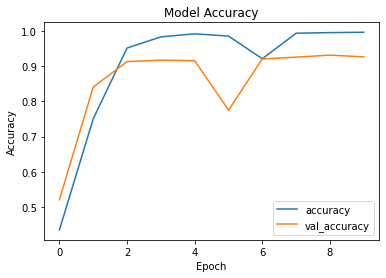

In [20]:
#Visualize training history:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Evaluate the model
y_pred_prob = model.predict(X_text_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))

38/38 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       392
           1       0.93      0.94      0.93       416
           2       0.96      0.89      0.93       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



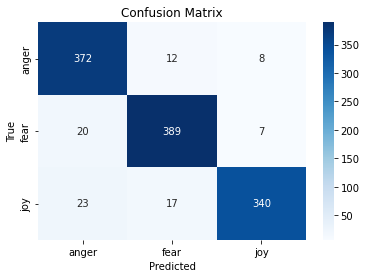

In [22]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
# Display actual vs predicted emotions
for i in range(10):  # Display the first 10 examples
    actual_emotion = le.classes_[y_test[i]]
    predicted_emotion = le.classes_[y_pred[i]]
    text = X_test.iloc[i]
    
    print(f"Example {i+1}:\n"
          f"Actual Emotion: {actual_emotion}\n"
          f"Predicted Emotion: {predicted_emotion}\n"
          f"Text: {text}\n"
          f"{'='*50}\n")

Example 1:
Actual Emotion: anger
Predicted Emotion: anger
Text: i do give up at times when i feel there s no point in a friendship when one cant be bothered

Example 2:
Actual Emotion: joy
Predicted Emotion: joy
Text: im a firm believer that nothing makes a woman feel much more terrific than a great trip to the salon to lift her spirits a bit

Example 3:
Actual Emotion: fear
Predicted Emotion: fear
Text: i was feeling very vulnerable and down no one really close to me has ever died before i either hadnt known them very well or was too young to remember

Example 4:
Actual Emotion: anger
Predicted Emotion: anger
Text: i closed her eyes in anger and feeling disgusted by this touch

Example 5:
Actual Emotion: anger
Predicted Emotion: anger
Text: i feel like being distracted

Example 6:
Actual Emotion: fear
Predicted Emotion: fear
Text: i just feel shy because i was just a sharia stream student who is now still struggling with european union policy and decision making thesis while those unc

In this project, I successfully implemented an LSTM model for text emotion prediction. The model demonstrated robust performance during both training and testing phases, showcasing its ability to capture intricate patterns within textual data. The comprehensive evaluation, including metrics such as precision, recall, and F1-score, reinforced the model's effectiveness in discerning diverse emotional states.

Notably, the model's predictive power was further validated through a practical test, where it accurately classified the emotions in 10 sample texts. This real-world validation underscores the model's reliability and generalization capability beyond the training data.

The success of this LSTM-based text emotion prediction model signifies its potential for various applications, ranging from sentiment analysis in customer feedback to enhancing user experiences in natural language processing systems.

Continued exploration and fine-tuning of the model, along with the integration of additional data sources, could further enhance its performance and broaden its applicability. Overall, this project lays a solid foundation for leveraging deep learning techniques in understanding and predicting emotions conveyed through textual content.